In [69]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [70]:
ara = pd.read_csv("./data/E-GEOD-38612-query-results.tpms.tsv", sep='\t', comment = '#', index_col=1) # 데이터의 구분자가 '\t'라는 것, '#'로 시작하는 것은 데이터가 아니다, 인덱스 컬럼을 정한다.


ara.head()

,Gene ID,leaf,flower,fruit,root
Gene Name,,,,,
NAC001,AT1G01010,4.0,11.0,3.0,39.0
ARV1,AT1G01020,16.0,15.0,7.0,18.0
NGA3,AT1G01030,5.0,7.0,1.0,2.0
DCL1,AT1G01040,17.0,21.0,17.0,19.0
MIR838A,AT1G01046,7.0,7.0,5.0,8.0


In [71]:
ara.drop('Gene ID', axis=1, inplace=True) # inplace : 원본에 바로 적용

In [72]:
ara.head()

,leaf,flower,fruit,root
Gene Name,,,,
NAC001,4.0,11.0,3.0,39.0
ARV1,16.0,15.0,7.0,18.0
NGA3,5.0,7.0,1.0,2.0
DCL1,17.0,21.0,17.0,19.0
MIR838A,7.0,7.0,5.0,8.0


## ara 데이터의 NaN 값을 zero-fill 해 주세요.
## ara의 value를 X 로 설정해 둡니다. 이 때, X는 numpy array 자료형으로 해 주세요. 데이터는 transform 해 주세요.

In [73]:
ara = ara.fillna(0)

ara.isnull().sum()

leaf      0
flower    0
fruit     0
root      0
dtype: int64

In [74]:
X = ara.values.T # T(transform) : # RNA를 가로, 기관 이름을 세로 방향으로 배열(column과 row를 바꾼다.)
# numpy array로 꼭 바꿔주는 게 더 좋다.

print(X) # X : 학습용 데이터

[[ 4.  16.   5.  ...  0.   0.   0. ]
 [11.  15.   7.  ...  0.4  0.2  0.2]
 [ 3.   7.   1.  ...  0.   0.   0.3]
 [39.  18.   2.  ...  0.2  1.   0.5]]


In [75]:
y= [1,2,3,4] # 라벨 : 숫자로 기관(열) 이름을 분류

## 사용법
1. 클래스 초기화
2. fit
3. predict (transform)

In [76]:
# 예측모델 불러오기
rfc = RandomForestClassifier(n_estimators=2000, random_state=12345) # n_estimators : 하위 결정 트리 모델의 개수, random_state : 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값

In [77]:
# random_state
import random

random.seed(12345) # 경우의 수를 이 경우로 고정 == random_state
random.randint(1,6) # 계속 4만 나옴.

4

In [78]:
rfc

RandomForestClassifier(n_estimators=2000, random_state=12345)

### fit() : 학습시킴(가중치를 업데이트함)
사용법 : fit(입력 데이터, 정답 데이터)

In [79]:
# 학습시키기 
rfc.fit(X,y)

RandomForestClassifier(n_estimators=2000, random_state=12345)

In [105]:
# 예측해보기
rfc.predict([X[0]]) # 안에 들어가는 값은 이차원 리스트여야 한다. (reshape를 사용할 수도 있음)

array([1])

In [90]:
y # X[0](1열) 값은 1이 나왔으므로 정답을 맞췄다.

[1, 2, 3, 4]

In [97]:
m = rfc.feature_importances_ > 0 # 분류에 영향을 끼친 정도 (중요도 : 높을수록 중요)

In [100]:
ara_fi = ara.index[m]
ara_fi

Index(['CNX3', 'AT1G01350', 'AT1G01440', 'AT1G01540', 'AT1G01715', 'PLIM2B',
       'AT1G01810', 'AT1G01970', 'SPL8', 'AT1G02080',
       ...
       'PETD', 'NDHD', 'RRN4.5S.2', 'TRNI.3', 'RPL16', 'ORF101A', 'RPL2',
       'NAD3', 'ORF262', 'ORF107H'],
      dtype='object', name='Gene Name', length=3243)

c:\Users\user\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\user\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


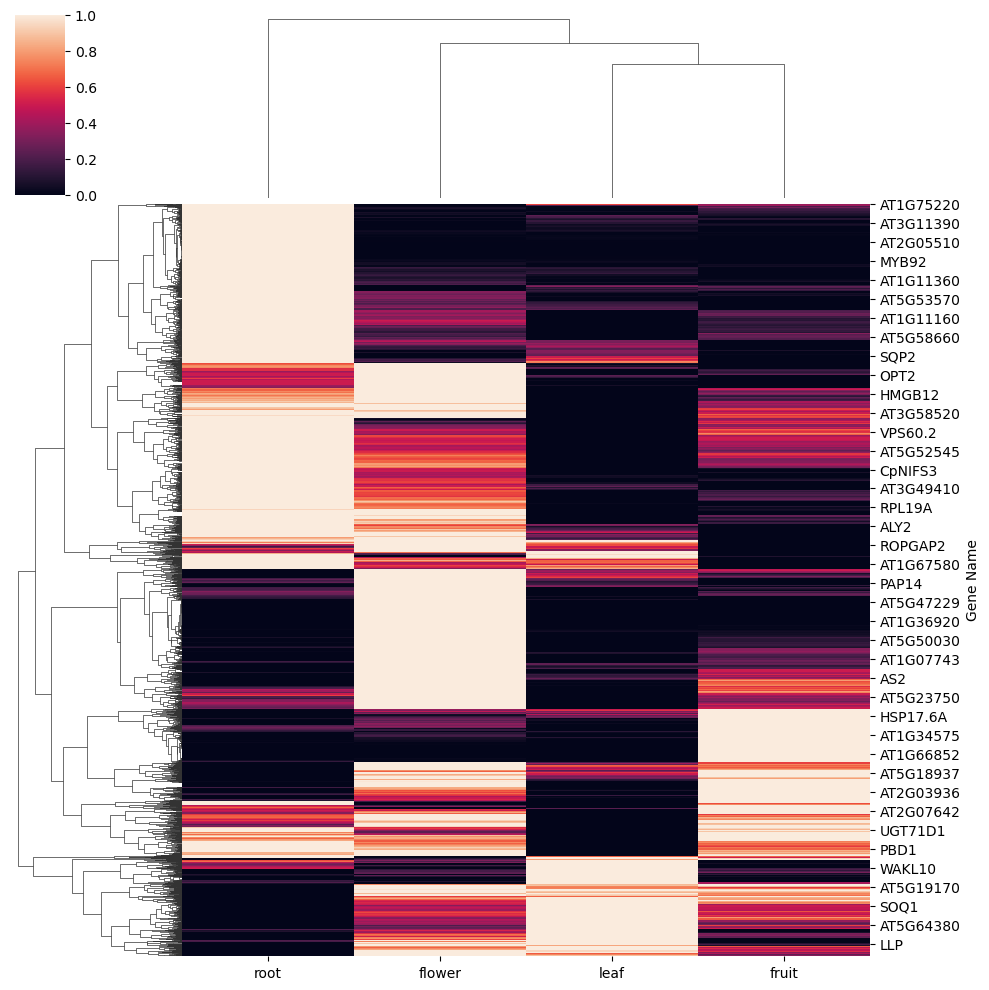

In [101]:
sns.clustermap(ara.loc[ara_fi], standard_scale=0)

밝은 부분이 유전자가 발현된 부분인데, 각 기관마다 발현된 유전자들이 다르다는 것을 알 수 있다.